# Polynomial Regression (Extended Linear Models with Basis Functions)

One common pattern within machine learning is to use linear models trained on nonlinear functions of the data. 

This approach maintains the generally fast performance of linear methods, while allowing them to fit a much wider range of data.

For example, a simple linear regression can be extended by constructing polynomial features from the coefficients. 

In the standard linear regression case, you might have a model that looks like this for two-dimensional data:

$$\hat{y} (w, x) = w_0 + w_1 x_1 + w_2 x_2$$

If we want to fit a paraboloid to the data instead of a plane, we can combine the features in second-order polynomials, so that the model looks like this:

$$\hat{y} (w, x) = w_0 + w_1 x_1 + w_2 x_2 + w_3 x_1 x_2 + w_4 x_{1}^{2} + w_5 x_{2}^{2}$$

We create a new set of features:
        
$$z = [x_1, x_2, x_1 x_2, x_{1}^{2}, x_{2}^{2}]$$

With this re-labeling of the data, our problem can be written:

$$\hat{y} (w, x) = w_0 + w_1 z_1 + w_2 z_2 + w_3 z_3 + w_4 z_4 + w_5 z_5 $$

We see that the resulting polynomial regression is in the same class of linear models we considered above (i.e., the model is linear in ) and can be solved by the same techniques. 

By considering linear fits within a higher-dimensional space built with these basis functions, the model has the flexibility to fit a much broader range of data.



Here is an example of applying this idea to one-dimensional data, using polynomial features of varying degrees:

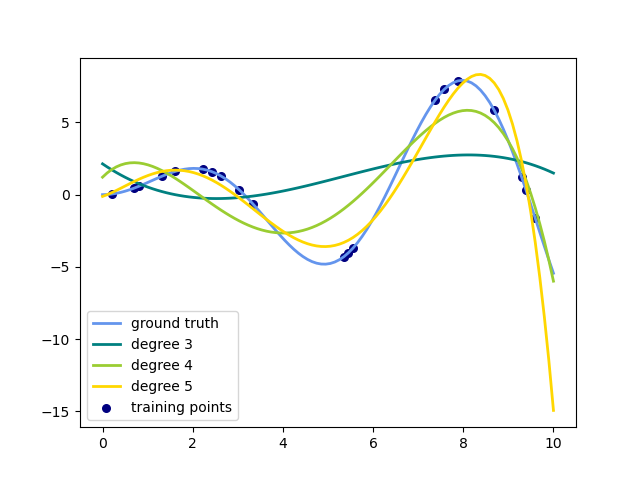

This figure is created using the PolynomialFeatures transformer, which transforms an input data matrix into a new data matrix of a given degree. It can be used as follows:

In [1]:
# Polynomial Linear Model
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.arange(6).reshape(3, 2)
print ('X:\n', X)
print()

#array([[0, 1],
#       [2, 3],
#       [4, 5]])
poly = PolynomialFeatures(degree=2)
print('poly.fit_transform(X):\n',poly.fit_transform(X))
print()
#array([[ 1.,  0.,  1.,  0.,  0.,  1.],
#       [ 1.,  2.,  3.,  4.,  6.,  9.],
#       [ 1.,  4.,  5., 16., 20., 25.]])

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
import numpy as np
model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(fit_intercept=False))])
# fit to an order-3 polynomial data
x = np.arange(5)
y = 3 - 2 * x + x ** 2 - x ** 3
model = model.fit(x[:, np.newaxis], y)
model.named_steps['linear'].coef_
print("model.named_steps['linear'].coef_:\n", model.named_steps['linear'].coef_)
# array([ 3., -2.,  1., -1.])

X:
 [[0 1]
 [2 3]
 [4 5]]

poly.fit_transform(X):
 [[ 1.  0.  1.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.]
 [ 1.  4.  5. 16. 20. 25.]]

model.named_steps['linear'].coef_:
 [ 3. -2.  1. -1.]


The linear model trained on polynomial features is able to exactly recover the input polynomial coefficients.

In some cases it’s not necessary to include higher powers of any single feature, but only the so-called interaction features that multiply together at most d distinct features. 

These can be gotten from PolynomialFeatures with the setting interaction_only=True.

For example, when dealing with boolean features, $ x_i^{n} = x_i $ for all $ n $ and is therefore useless; but $ x_i x_j $ represents the conjunction of two booleans. 

This way, we can solve the XOR problem with a linear classifier.

And the classifier “predictions” are perfect:

In [12]:
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import PolynomialFeatures
import numpy as np
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = X[:, 0] ^ X[:, 1]
print('y:\n', y)
print()
#array([0, 1, 1, 0])
X = PolynomialFeatures(interaction_only=True).fit_transform(X).astype(int)
print('X:\n', X)
print()
#array([[1, 0, 0, 0],
#       [1, 0, 1, 0],
#       [1, 1, 0, 0],
#       [1, 1, 1, 1]])

#clf = Perceptron(fit_intercept=False, max_iter=10, tol=None, shuffle=False).fit(X, y)
# FutureWarning: max_iter and tol parameters have been added in Perceptron in 0.19. 
# If max_iter is set but tol is left unset, the default value for tol in 0.19 and 0.20 will be None
# (which is equivalent to -infinity, so it has no effect) but will change in 0.21 to 1e-3. 
# Specify tol to silence this warning.FutureWarning)
clf = Perceptron(fit_intercept=False, max_iter=50, tol=1e-3, shuffle=False).fit(X, y)

# And the classifier “predictions” are perfect:
print('clf.predict(X):\n', clf.predict(X))
print()
#array([0, 1, 1, 0])
print('clf.score(X, y):\n', clf.score(X, y))
#1.0

y:
 [0 1 1 0]

X:
 [[1 0 0 0]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 1]]

clf.predict(X):
 [0 1 1 0]

clf.score(X, y):
 1.0
